# Plese install 
# pip install iglovikov_helper_functions

In [1]:
from pylab import imshow
import numpy as np
import cv2
import torch
import albumentations as albu
import wget
import os
import time
import matplotlib.pyplot as plt
##______
import requests
from io import BytesIO
from PIL import Image
#__________
import urllib.request
%matplotlib inline

In [2]:
from iglovikov_helper_functions.utils.image_utils import load_rgb, pad, unpad
from iglovikov_helper_functions.dl.pytorch.utils import tensor_from_rgb_image

# 넣고 싶은 사진 URL을 아래에 첨부해주세요 url = "주소"

In [3]:

url ="https://assets.blog.engoo.com/wp-content/uploads/sites/2/2018/10/18083723/photo-1474925218713-9e8a1d89c7b4.jpg"
wget.download(url)

100% [............................................................................] 116408 / 116408

'photo-1474925218713-9e8a1d89c7b4 (3).jpg'

In [4]:
from people_segmentation.pre_trained_models import create_model

In [5]:
model = create_model("Unet_2020-07-20")

C:\Users\Admin\Anaconda3\envs\G\lib\site-packages\torch\hub.py:647: UserWarning: Falling back to the old format < 1.6. This support will be deprecated in favor of default zipfile format introduced in 1.6. Please redo torch.save() to save it in the new zipfile format.
  warnings.warn('Falling back to the old format < 1.6. This support will be '


In [6]:
model.eval();

# image = load_rgb는 위에 url에서 바뀐 url을 넣어주세요

In [7]:
image = load_rgb("photo-1474925218713-9e8a1d89c7b4.jpg")

In [8]:
transform = albu.Compose([albu.Normalize(p=1)], p=1)

# 출력하시고 싶은 이미지를 확인해보세요

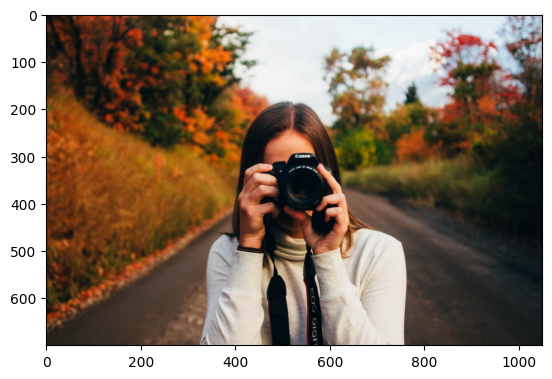

In [9]:
imshow(image)

In [10]:
padded_image, pads = pad(image, factor=32, border=cv2.BORDER_CONSTANT)

In [11]:
x = transform(image=padded_image)["image"]
x = torch.unsqueeze(tensor_from_rgb_image(x), 0)

In [12]:
with torch.no_grad():
  prediction = model(x)[0][0]


In [13]:
mask = (prediction > 0).cpu().numpy().astype(np.uint8)

In [14]:
mask = unpad(mask, pads)

# Segmentation으로 이미지를 추출

(700, 1050)


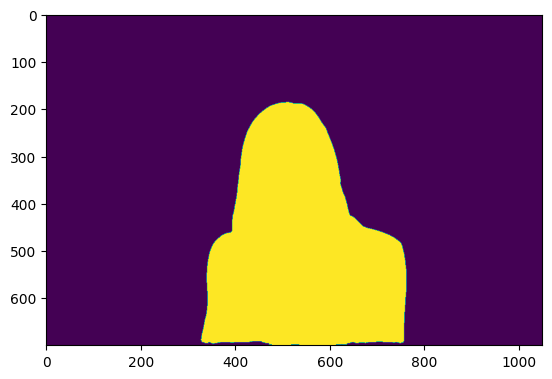

In [15]:
imshow(mask)
print(mask.shape)

# 아래에 과정을 통해서 누끼를 딸 부분을 바꾼다

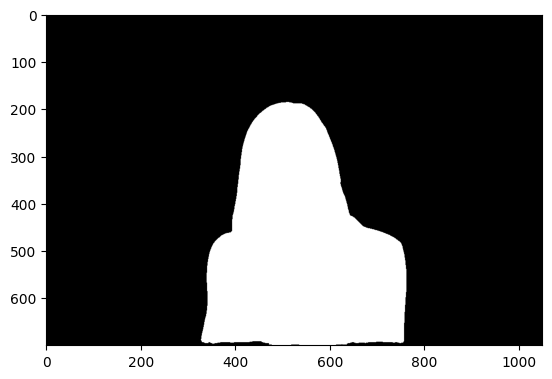

In [16]:
mask1 = cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * (255, 255, 255)
imshow(mask1)

In [17]:
cv2.imwrite('back.jpg', mask)
print(mask.shape)

###이것도 확인해보자

(700, 1050)


In [18]:
dst = cv2.addWeighted(image, 1, (cv2.cvtColor(mask, cv2.COLOR_GRAY2RGB) * (255, 0, 0)).astype(np.uint8), 0.2, 0)

# 누끼를 딸 부분에 이미지를 빨간색으로 바꿔 2차적으로 확인을 한다

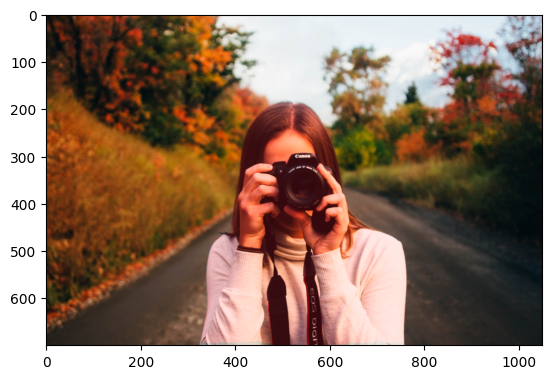

In [19]:
plt.imshow(dst)

# 사람부분을 제거해서 이미지만 추출합니다

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(700, 1050, 3)


True

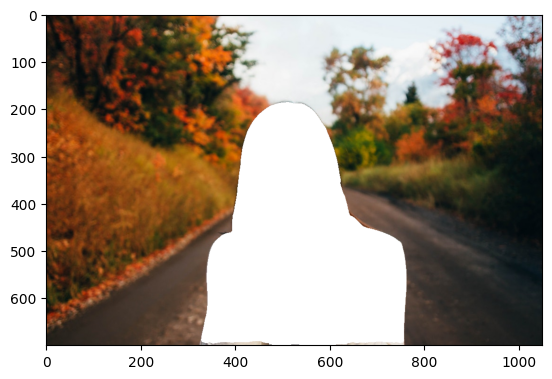

In [20]:
remove = mask1+dst
print(remove.shape)###630, 1200, 3 ->255가 아닌 값들은 전부다 255로 바꿔버리고 255가 맞는것들은 0으로
plt.imshow(remove)

cv2.imwrite('nox.jpg', remove)

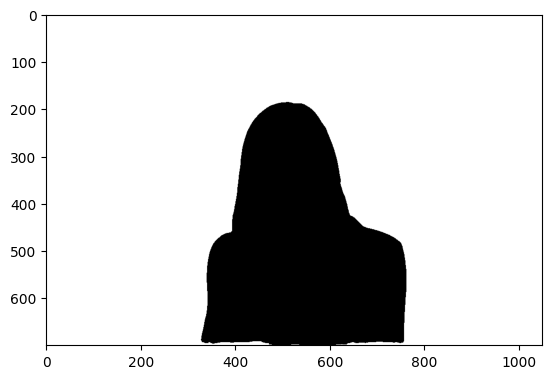

In [21]:
re = 255-mask1
plt.imshow(re)

In [22]:
###첫번째 이미지 합성부분

'''oo = image+mask

plt.imshow(oo)'''

'oo = image+mask\n\nplt.imshow(oo)'

# 배경을 제외한 사람만 출력

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


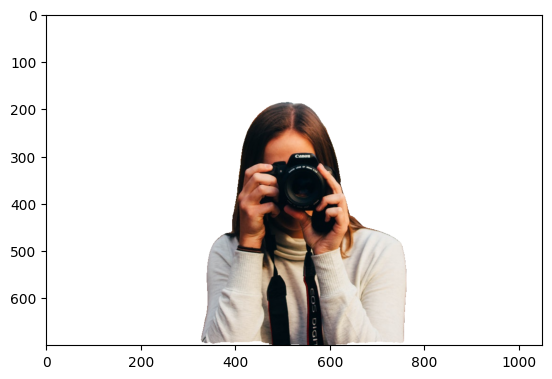

In [23]:
a = image+re
plt.imshow(a)

In [24]:
cv2.imwrite('rs.jpg', a)

True

In [25]:
cv2.imwrite('Me1.jpg', dst)

True

#  원본 이미즈를 Edge Image로 변환

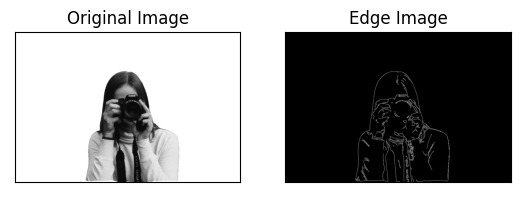

In [26]:
img = cv2.imread('rs.jpg',0)
edges = cv2.Canny(img,100,200, 3) ### 엣지 이미지 하나랑!
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [27]:
mask1 = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB) * (255, 255, 255)

print(edges.shape)

(700, 1050)


# Edge부분이 하얀색으로 출력(흰->검)으로 Edge를 변경

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


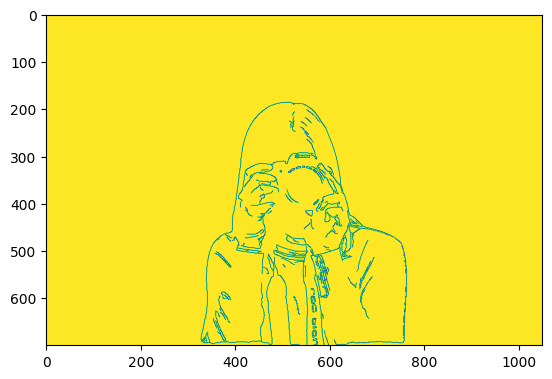

In [28]:
###plt.imshow(edges)

edges10 = 255-edges
plt.imshow(edges10)

print(edges10)

In [29]:
cv2.imwrite('edge.jpg', edges)
cv2.imwrite('e1.jpg', edges10)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [30]:
cv2.imwrite('M.jpg', edges10)

True

In [31]:
print(edges10.shape)

(700, 1050)


In [32]:
cv2.imwrite('M.jpg', edges10)

True

In [33]:
background = cv2.imread('rs.jpg')
overlay = cv2.imread('M.jpg')
added_image = cv2.addWeighted(background,0.3,overlay,0.69,0.1)

cv2.imwrite('combined.png', added_image)

True

# Edge+사람 누끼부분을 합친다. -> 이미지를 하얗게 한 이유는 
# 잘보이기 위해서 하얗게 진행

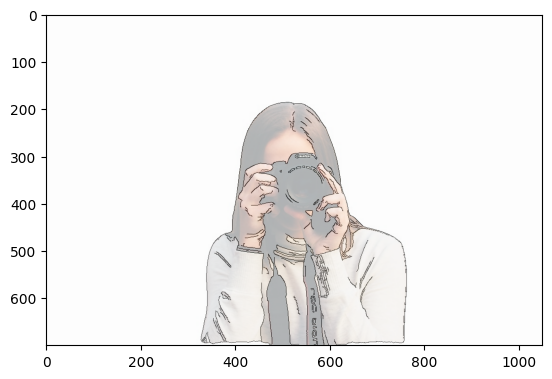

In [34]:
plt.imshow(added_image)

In [35]:
c = added_image + re

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

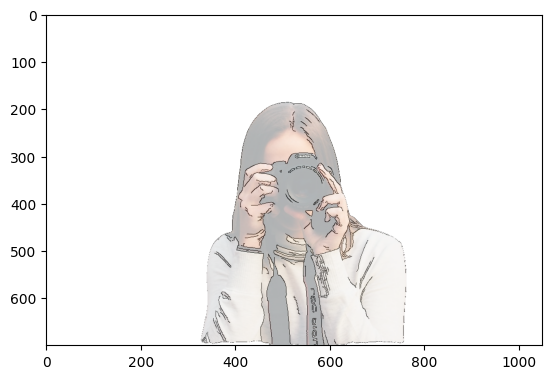

In [36]:
plt.imshow(c)
cv2.imwrite('peopleo.jpg', c)

In [37]:
background = cv2.imread('peopleo.jpg')
overlay = cv2.imread('nox.jpg')
add = cv2.addWeighted(background,0.5,overlay,0.5,0)

cv2.imwrite('combined.png', add)

True

In [38]:
upadd = overlay+background

# 최종 결과본

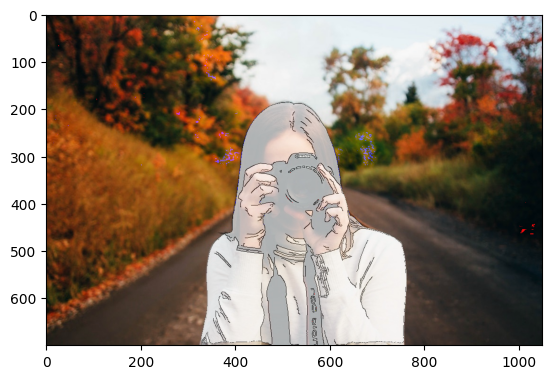

In [39]:
plt.imshow(upadd)

# 2차 이미지

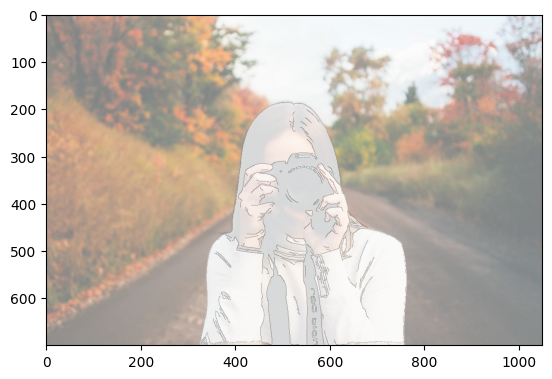

In [40]:
plt.imshow(add)